420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2020 - Spécialisation technique en Intelligence Artificielle<br/>
MIT License - Copyright (c) 2020 Mikaël Swawola
<br/>
![Travaux Pratiques - Bagging, forêts aléatoires et boosting](static/16-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la mise en oeuvre des techniques suivantes:
* Bagging
* Forêts aléatoires
* Gradient Boosting
* AdaBoost
* XGBoost
* LightGBM

Le jeu de données utilisée sera **Heart**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Exercice 1 - Chargement et préparation des données

In [2]:
import pandas as pd

In [3]:
HRT = pd.read_csv('../../data/Heart.csv', index_col=[0])
HRT = HRT.dropna()

In [4]:
HRT_onehot = pd.get_dummies(HRT, columns=['ChestPain','Thal'], prefix = ['cp','thal'], drop_first=True)
X = HRT_onehot.drop(['AHD'], axis=1)
y = (HRT['AHD'] == "Yes").astype(int)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=2020)

## Exercice 2 - Arbres de classification (avec élagage)

In [11]:
def drop_unnamed_col(pDf):
    return  pDf.loc[:, ~pDf.columns.str.contains('^Unnamed')]

In [14]:
def getDfNum(pDf):
    return  pd.get_dummies(pDf, drop_first=True, prefix_sep="_")

In [15]:
def getDfXDfY(pDf, pColY):
    dfY = pd.DataFrame(pDf[pColY])
    dfX = pDf.drop([pColY], axis=1)
    return dfX, dfY

In [16]:
dfHeart = HRT_onehot
dfHeart = drop_unnamed_col(dfHeart)
dfHeart.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,cp_nonanginal,cp_nontypical,cp_typical,thal_normal,thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,1,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,1,0,1,0


In [18]:
dfHeart.dropna(inplace=True)
dfHeartNum = getDfNum(dfHeart)

In [31]:
dfXHeart, dfYHeart = getDfXDfY(dfHeartNum, 'AHD_Yes')

In [32]:
### definir baseline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt

#### Définition du modèle et entraînement

#### Prédictions (train et val)

#### Aire sous la courbe

## Exercice 3 - Bagging

In [37]:
from sklearn import ensemble

X_train, X_test, y_train, y_test = train_test_split(dfXHeart, dfYHeart)

model = ensemble.BaggingClassifier( DecisionTreeClassifier(), n_estimators=10, 
max_samples=1.0
, max_features=1.0, bootstrap=True
, bootstrap_features=False, oob_score=False, warm_start=False
, n_jobs=None, random_state=None
, verbose=0)

In [39]:
#type(model)
model.fit(X_train, y_train.values.ravel())
train_pred = model.predict_proba(X_train)
test_pred= model.predict_proba(X_train)

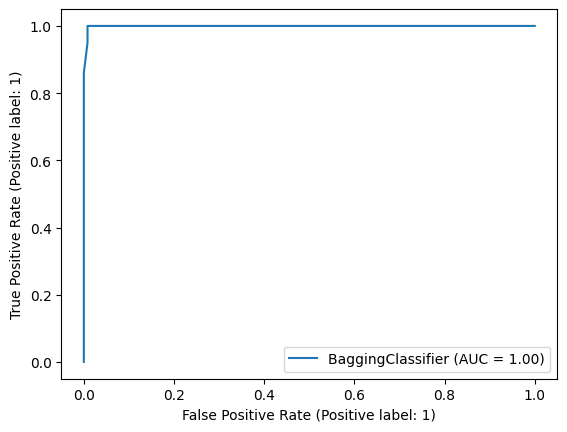

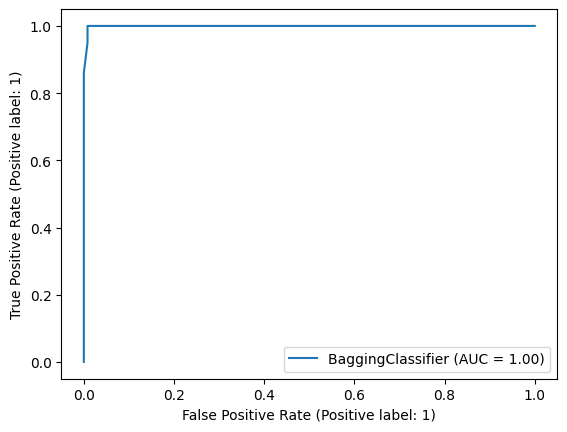

In [42]:
from sklearn import metrics

#fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
#roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay.from_estimator(model, X_train, y_train)
#roc_display.plot()

[class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

#### Définition du modèle et entraînement

#### Prédictions (train et val)

#### Aire sous la courbe

## Exercice 4 - Forêts aléatoires

In [69]:
import collections
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(dfXHeart, dfYHeart)

results = collections.defaultdict(list)
for i in range (2, 11):
    model = ensemble.RandomForestClassifier ( )
    model.fit(X_train, y_train.values.ravel())

    scores = cross_val_score(model, X_train, y_train.values.ravel(), scoring='roc_auc', cv=5)
    results['score'].append(scores.mean())
    results['n_estimators'].append(i)

    #train_pred = model.predict_proba(X_train)
    #test_pred= model.predict_proba(X_train)

dfScores = pd.DataFrame(results)
#roc_display = metrics.RocCurveDisplay.from_estimator(model, X_train, y_train)


In [90]:
dfScores
best_score = dfScores['score'].max()
idMax = dfScores['score'].idxmax()
best_n_estimators = dfScores['n_estimators'][idMax]

print(dfScores)
print(idMax)
print(best_n_estimators)

      score  n_estimators
0  0.911810             2
1  0.922127             3
2  0.920307             4
3  0.911042             5
4  0.919979             6
5  0.921161             7
6  0.910309             8
7  0.914890             9
8  0.913233            10
1
3


In [93]:
best_estimator = ensemble.RandomForestClassifier(n_estimators = 75)
best_estimator.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=75)

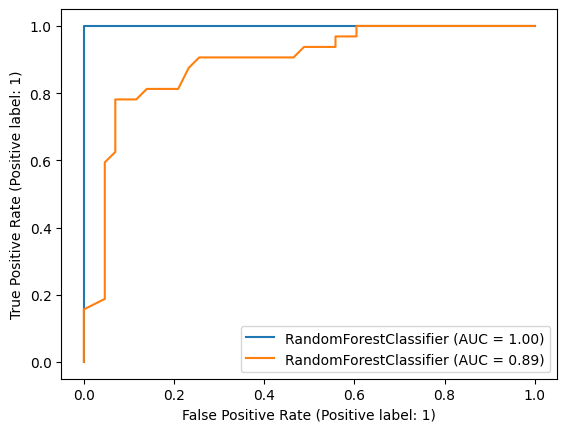

In [94]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(best_estimator, X_train, y_train, ax=ax)
metrics.RocCurveDisplay.from_estimator(best_estimator, X_test, y_test, ax=ax)

[class sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Définition du modèle et entraînement

#### Prédictions (train et val)

#### Aire sous la courbe

## Exercice 5 - AdaBoost

[class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

#### Définition du modèle et entraînement

#### Prédiction (train et val)

#### Aire sous la courbe

## Exercice 6 - Gradient Boosting

[class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

#### Définition du modèle et entraînement

#### Prédiction (train et val)

#### Aire sous la courbe

## Exercice 7 - XGBoost

[XGBoost Scikit-learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

#### Définition du modèle et entraînement

#### Prédictions (train et val)

#### Aire sous la courbe

## Exercice 8 - LightGBM

#### Définition du modèle et entraînement

#### Prédictions (train et val)

#### Aire sous la courbe

## Exercice 9 - Évaluation des modèles

## Exercice 10 - Importance des variables explicatives